#Import 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn import metrics
import keras
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
import nltk
import os
from nltk.util import ngrams
import re
from nltk.corpus import stopwords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import string
import numpy as np


In [ ]:
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
dataset_dir="datasets/"

#Read the dataset

In [4]:
emails=pd.read_csv(dataset_dir+"emails_dataset.csv")
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
emails.shape

(5728, 2)

In [ ]:
emails['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [ ]:
emails.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
emails.isna().sum()

text    0
spam    0
dtype: int64

In [ ]:
emails['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
emails['spam'].value_counts(normalize=True)*100

0    76.117318
1    23.882682
Name: spam, dtype: float64

In [ ]:
sns.countplot(emails['spam'])

#Text Preprocessing

##A. Cleaning the Raw Data
1.    Lowering case
2.    Removal of special characters
3.    Removal of stopwords
4.    Removal of hyperlinks
5.    Removal of numbers
6.    Removal of whitespaces
7.    Removal of HTML tags
8.    Removal of @ (tags):




###1. Lowering case

In [ ]:
def to_lower(emails):
  emails_List=[]
  for sublist in emails:
    result = sublist.lower()
    emails_List.append(result)
  return emails_List

In [ ]:
emails['text']=to_lower(emails['text'])
emails

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1
...,...,...
5723,subject: re : research and development charges...,0
5724,"subject: re : receipts from visit jim , than...",0
5725,subject: re : enron case study update wow ! a...,0
5726,"subject: re : interest david , please , call...",0


###2. Removal of special characters
    

In [ ]:
def remove_special_characters(emails):
  emails_List=[]
  for sublist in emails:
    result=sublist.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    emails_List.append(result)
  return emails_List

In [ ]:
emails['text']=remove_special_characters(emails['text'])
emails

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is...,1
2,subject unbelievable new homes made easy im w...,1
3,subject 4 color printing special request addi...,1
4,subject do not have money get software cds fr...,1
...,...,...
5723,subject re research and development charges t...,0
5724,subject re receipts from visit jim thanks ...,0
5725,subject re enron case study update wow all ...,0
5726,subject re interest david please call shi...,0


###3. Removal of stopwords
    

In [ ]:
ENGLISH_STOP_WORDS = set(stopwords.words('english'))
def remove_stop_words(emails):
  emails_List= []
  elems=[]
  tokens = [nltk.word_tokenize(elem) for elem in emails ]
  
  for sublist in tokens:
    elems = [elem for elem in sublist if elem not in ENGLISH_STOP_WORDS]
  #   if elem not in ENGLISH_STOP_WORDS:
  #     elems.append(elem)
  # # result = [i for i in tokens if i not in ENGLISH_STOP_WORDS]
    emails_List.append(elems)

  clean_text=[]
  for sublist in emails_List:
      # print(sublist)
      new_sublist = " ".join(sublist)
      # print(sublist)
      clean_text.append(new_sublist)
  return clean_text

In [ ]:
emails['text']=remove_stop_words(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1
...,...,...
5723,subject research development charges gpg forwa...,0
5724,subject receipts visit jim thanks invitation v...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


###4. Removal of hyperlinks
    

In [ ]:
def remove_hyperlink(emails):
  url=[]
  for item in emails:
    result=re.sub(r'http\S+', '', item, flags=re.MULTILINE)
    url.append(result)
  return url

In [ ]:
emails['text']=remove_hyperlink(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1
...,...,...
5723,subject research development charges gpg forwa...,0
5724,subject receipts visit jim thanks invitation v...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


###5. Removal of numbers

In [ ]:
def remove_number(emails):
  emails_list=[]
  for item in emails:
    result=re.sub(r'\b\w+\s*\d+[A-Za-z]*\b', '', item, flags=re.MULTILINE)
    emails_list.append(result)
  return emails_list

In [ ]:
emails['text']=remove_number(emails['text'])
emails['text']=remove_number(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,color printing special request additional inf...,1
4,subject money get software cds software compat...,1
...,...,...
5723,subject research development charges gpg forwa...,0
5724,subject receipts visit jim thanks invitation v...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


###6. Removal of whitespaces

In [ ]:
def remove_whitespaces(emails):
  emails_list=[]
  for item in emails:
    result=" ".join(item.split())
    emails_list.append(result)
  return emails_list

In [ ]:
emails['text']=remove_whitespaces(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,color printing special request additional info...,1
4,subject money get software cds software compat...,1
...,...,...
5723,subject research development charges gpg forwa...,0
5724,subject receipts visit jim thanks invitation v...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


###7. Removal of HTML tags

In [ ]:
def remove_HTML(emails):
  emails_list=[]
  for item in emails:
    result=re.sub(r"'<.*?>'", '', item, flags=re.MULTILINE)
    emails_list.append(result)
  return emails_list

In [ ]:
emails['text']=remove_HTML(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,color printing special request additional info...,1
4,subject money get software cds software compat...,1
...,...,...
5723,subject research development charges gpg forwa...,0
5724,subject receipts visit jim thanks invitation v...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


###8. Removal of @ (tags):

In [ ]:
def remove_tag(emails):
  emails_list=[]
  for item in emails:
    result=re.sub(r'@\S+', '', item, flags=re.MULTILINE)
    emails_list.append(result)
  return emails_list

In [ ]:
emails['text']=remove_tag(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,color printing special request additional info...,1
4,subject money get software cds software compat...,1
...,...,...
5723,subject research development charges gpg forwa...,0
5724,subject receipts visit jim thanks invitation v...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


##B. Tokenisation the cleaned data : word tokenize

In [ ]:
def tokenize(emails):
  tokens = [nltk.word_tokenize(elem) for elem in emails ]
  return tokens


In [ ]:
emails['text']=tokenize(emails['text'])
emails

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[color, printing, special, request, additional...",1
4,"[subject, money, get, software, cds, software,...",1
...,...,...
5723,"[subject, research, development, charges, gpg,...",0
5724,"[subject, receipts, visit, jim, thanks, invita...",0
5725,"[subject, enron, case, study, update, wow, day...",0
5726,"[subject, interest, david, please, call, shirl...",0


##C. lemmatisation the cleaned data

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatization(emails):
  emails_List= []
  elems=[]
  # tokens = [nltk.word_tokenize(elem) for elem in emails ]
  
  for sublist in emails:
    elems = [lemmatizer.lemmatize(elem) for elem in sublist ]
  #   if elem not in ENGLISH_STOP_WORDS:
  #     elems.append(elem)
  # # result = [i for i in tokens if i not in ENGLISH_STOP_WORDS]
    emails_List.append(elems)

  clean_text=[]
  for sublist in emails_List:
      # print(sublist)
      new_sublist = " ".join(sublist)
      # print(sublist)
      clean_text.append(new_sublist)
  return clean_text

In [ ]:
emails['text']=lemmatization(emails['text'])
emails

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,color printing special request additional info...,1
4,subject money get software cd software compati...,1
...,...,...
5723,subject research development charge gpg forwar...,0
5724,subject receipt visit jim thanks invitation vi...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


In [ ]:
emails['text'][0]

'subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good product effective business organization practicable aim hotat nowadays market promise marketing effort become much effective list clear benefit creativeness hand made original logo specially done reflect distinctive company image convenience logo stationery provided format easy use content management system letsyou change website content even structure promptness see logo draft within three business day affordability marketing break make gap satisfaction guaranteed provide unlimited amount change extra fee surethat love result collaboration look portfolio interested'

# Text Representation 

###TF-iDF

In [ ]:
def tfidf_train(train_data):
    '''This function creates TFIDF representation of train data'''
    vectorizer_tfidf = TfidfVectorizer()
    vectorizer_tfidf.fit(train_data)
    text_tfidf_train = vectorizer_tfidf.transform(train_data)
    # print(text_tfidf_train)
    filename = 'tfidf_model_emails.sav'
    pickle.dump(vectorizer_tfidf, open(filename, 'wb'))
    return vectorizer_tfidf,text_tfidf_train

def tfidf_test(tfidf_model,test_data):
    '''This function creates TFIDF representation of test data'''
    return tfidf_model.transform(test_data)

###BAG of WORD

In [ ]:
def bow_train(train_data):
    '''This function creates BOW representation of train data'''
    vectorizer_bow=CountVectorizer()
    vectorizer_bow.fit(train_data)
    text_bow_train = vectorizer_bow.transform(train_data)
    # print(text_tfidf_train)
    filename = 'bow_model_emails.sav'
    pickle.dump(vectorizer_bow, open(filename, 'wb'))
    return vectorizer_bow,text_bow_train

def bow_test(bow_model,test_data):
    '''This function creates TFIDF representation of test data'''
    return bow_model.transform(test_data)

#Knowledge discovery 

##Split data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(emails['text'], emails['spam'], random_state=0)

In [ ]:
print("X_train.shape: ",X_train.shape,
      "\ny_train.shape: ",y_train.shape,
      "\nX_test.shape: ",X_test.shape,
      "\ny_test.shape: ",y_test.shape)

X_train.shape:  (4296,) 
y_train.shape:  (4296,) 
X_test.shape:  (1432,) 
y_test.shape:  (1432,)


##Vectorisation : train & test

###TF-iDF : train & test

In [ ]:
vectorizer_tfidf,text_tfidf_train=tfidf_train(X_train)

In [ ]:
text_tfidf_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
with open('/content/tfidf_model_emails.sav', 'rb') as f:
    tfidf_model = pickle.load(f)
# tfidf_model=load("/content/tfidf_model_emails.sav")

In [ ]:
tfidf_test=tfidf_test(tfidf_model,X_test)

In [ ]:
tfidf_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(tfidf_model.vocabulary_)
print(vectorizer_tfidf.vocabulary_)

{'subject': 22494, 'get': 9529, 'software': 21693, 'need': 15538, 'popular': 17789, 'bundle': 3065, 'last': 13036, 'word': 25759, 'people': 17157, 'said': 20426, 'anything': 1162, 'life': 13346, 'human': 10833, 'nature': 15474, 'constitutes': 4797, 'part': 16895, 'evidence': 8039, 'every': 8031, 'case': 3453, 'check': 3796, 'vince': 24983, 'please': 17604, 'find': 8710, 'attached': 1601, 'invoice': 11827, 'sent': 20948, 'habiba': 10057, 'back': 1856, 'september': 20969, 'thanks': 23335, 'julie': 12400, 'original': 16491, 'message': 14580, 'kaminski': 12476, 'enron': 7650, 'com': 4346, 'lacima': 12946, 'co': 4195, 'uk': 24187, 'cc': 3549, 'wednesday': 25376, 'pm': 17656, 'yes': 26030, 'split': 21962, 'expense': 8203, 'internally': 11702, 'send': 20924, 'oh': 16205, 'informed': 11441, 'passed': 16947, 'along': 774, 'handling': 10134, 'agreement': 530, 'take': 22968, 'fiona': 8731, 'grant': 9812, 'london': 13594, 'another': 1100, 'next': 15684, 'week': 25379, 'remaining': 19478, 'balance'

In [ ]:
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(vectorizer_tfidf.get_feature_names_out(), vectorizer_tfidf.idf_):
    print(ele1, ':', ele2)

Streaming output truncated to the last 5000 lines.
shuffle : 8.267060095106885
shulklapper : 8.672525203215049
shults : 7.756234471340894
shut : 7.168447806438776
shutdown : 7.979378022655104
shuttle : 7.28623084209516
shw : 8.672525203215049
shy : 8.267060095106885
shymail : 8.672525203215049
si : 6.880765733986995
sia : 8.672525203215049
siad : 8.672525203215049
siam : 7.168447806438776
sic : 7.979378022655104
sicaf : 8.672525203215049
sich : 7.756234471340894
sick : 6.421233404608555
sickle : 8.672525203215049
sid : 7.756234471340894
siddiqi : 8.267060095106885
siddique : 8.672525203215049
side : 4.6034984489772395
sideline : 8.267060095106885
sidelining : 8.672525203215049
sidewalk : 8.672525203215049
sideways : 8.672525203215049
siding : 8.672525203215049
sidney : 7.979378022655104
sie : 6.230178167845845
siebel : 7.979378022655104
siedzial : 8.672525203215049
siedziby : 8.672525203215049
siegel : 8.672525203215049
siemens : 8.672525203215049
sierra : 7.419762234719681
siesmic : 8

###BOW : train & test

In [ ]:
vectorizer_bow,text_bow_train=bow_train(X_train)

In [ ]:
text_bow_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
with open('/content/bow_model_emails.sav', 'rb') as f:
    bow_model = pickle.load(f)
# tfidf_model=load("/content/tfidf_model_emails.sav")

In [ ]:
bow_test=bow_test(bow_model,X_test)

In [ ]:
bow_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(bow_model.vocabulary_)

{'subject': 22494, 'get': 9529, 'software': 21693, 'need': 15538, 'popular': 17789, 'bundle': 3065, 'last': 13036, 'word': 25759, 'people': 17157, 'said': 20426, 'anything': 1162, 'life': 13346, 'human': 10833, 'nature': 15474, 'constitutes': 4797, 'part': 16895, 'evidence': 8039, 'every': 8031, 'case': 3453, 'check': 3796, 'vince': 24983, 'please': 17604, 'find': 8710, 'attached': 1601, 'invoice': 11827, 'sent': 20948, 'habiba': 10057, 'back': 1856, 'september': 20969, 'thanks': 23335, 'julie': 12400, 'original': 16491, 'message': 14580, 'kaminski': 12476, 'enron': 7650, 'com': 4346, 'lacima': 12946, 'co': 4195, 'uk': 24187, 'cc': 3549, 'wednesday': 25376, 'pm': 17656, 'yes': 26030, 'split': 21962, 'expense': 8203, 'internally': 11702, 'send': 20924, 'oh': 16205, 'informed': 11441, 'passed': 16947, 'along': 774, 'handling': 10134, 'agreement': 530, 'take': 22968, 'fiona': 8731, 'grant': 9812, 'london': 13594, 'another': 1100, 'next': 15684, 'week': 25379, 'remaining': 19478, 'balance'

In [ ]:
bow_model.vocabulary_

{'subject': 22494,
 'get': 9529,
 'software': 21693,
 'need': 15538,
 'popular': 17789,
 'bundle': 3065,
 'last': 13036,
 'word': 25759,
 'people': 17157,
 'said': 20426,
 'anything': 1162,
 'life': 13346,
 'human': 10833,
 'nature': 15474,
 'constitutes': 4797,
 'part': 16895,
 'evidence': 8039,
 'every': 8031,
 'case': 3453,
 'check': 3796,
 'vince': 24983,
 'please': 17604,
 'find': 8710,
 'attached': 1601,
 'invoice': 11827,
 'sent': 20948,
 'habiba': 10057,
 'back': 1856,
 'september': 20969,
 'thanks': 23335,
 'julie': 12400,
 'original': 16491,
 'message': 14580,
 'kaminski': 12476,
 'enron': 7650,
 'com': 4346,
 'lacima': 12946,
 'co': 4195,
 'uk': 24187,
 'cc': 3549,
 'wednesday': 25376,
 'pm': 17656,
 'yes': 26030,
 'split': 21962,
 'expense': 8203,
 'internally': 11702,
 'send': 20924,
 'oh': 16205,
 'informed': 11441,
 'passed': 16947,
 'along': 774,
 'handling': 10134,
 'agreement': 530,
 'take': 22968,
 'fiona': 8731,
 'grant': 9812,
 'london': 13594,
 'another': 1100,
 '

##Evaluate Function to evaluate ML models

In [ ]:
def evaluate(y_test,y_pred,clf):
  "This function is used to evaluate a model on metrics like accuracy,f1 score,f-0.5 score and confusion matrix "
  print("ACCURACY:", accuracy_score(y_test, y_pred))
  print("F-1 SCORE:", metrics.f1_score(y_test, y_pred))
  print("F-0.5 SCORE WEIGHTED:", metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))
  print("F-0.5 SCORE MACRO:", metrics.fbeta_score(y_test, y_pred, average='macro', beta=0.5))
  print("F-0.5 SCORE MICRO:", metrics.fbeta_score(y_test, y_pred, average='micro', beta=0.5))
  print(metrics.classification_report(y_test, y_pred, target_names=['0/ham','1/spam']))
  print("CONFUSION MATRIX:")
  cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  plt.show()

##Models

###A-Random Forest

####Model def

In [ ]:
clf_RF_tfidf = RandomForestClassifier(random_state = 42,n_estimators=2000,n_jobs=-1)
clf_RF_bow = RandomForestClassifier(random_state = 42,n_estimators=2000,n_jobs=-1)


####Train the model

In [ ]:
epochs=4

#####TF-iDF

In [ ]:
for i in range(epochs):
    clf_RF_tfidf.fit(text_tfidf_train, y_train)

In [ ]:
y_pred_train_RF_tfidf = clf_RF_tfidf.predict(text_tfidf_train)

#####BoW

In [ ]:
for i in range(epochs):
    clf_RF_bow.fit(text_bow_train, y_train)

In [ ]:
y_pred_train_RF_bow = clf_RF_bow.predict(text_bow_train)

#####Accuracy Resultats

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','Random Forest TF-iDF','Random Forest BoW']
table.add_row(['Train Error ', metrics.mean_squared_error(y_train,y_pred_train_RF_tfidf), metrics.mean_squared_error(y_train,y_pred_train_RF_bow)])
table.add_row(['','',''])
table.add_row(['train Accuracy ', metrics.accuracy_score(y_train,y_pred_train_RF_tfidf),metrics.accuracy_score(y_train,y_pred_train_RF_bow)])

print(table)

+-----------------+----------------------+-------------------+
|    Classifier   | Random Forest TF-iDF | Random Forest BoW |
+-----------------+----------------------+-------------------+
|   Train Error   |         0.0          |        0.0        |
|                 |                      |                   |
| train Accuracy  |         1.0          |        1.0        |
+-----------------+----------------------+-------------------+


In [ ]:
# import joblib

In [ ]:
# joblib.dump(clf_RF, "random_forest_model.joblib")

In [ ]:
# loaded_rf = joblib.load("random_forest_model.joblib")

####Test the model

#####TF-iDF

In [ ]:
y_pred_RF_tfidf= clf_RF_tfidf.predict(tfidf_test)

#####BoW

In [ ]:
y_pred_RF_bow= clf_RF_bow.predict(bow_test)

#####Accuracy Resultats

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','Random Forest TF-iDF','Random Forest BoW']
table.add_row(['Test Error ', 1-metrics.accuracy_score(y_test,y_pred_RF_tfidf),1-metrics.accuracy_score(y_test,y_pred_RF_bow)])
table.add_row(['','',''])
table.add_row(['Test Accuracy ', metrics.accuracy_score(y_test,y_pred_RF_tfidf),metrics.accuracy_score(y_test,y_pred_RF_bow)])

print(table)

+----------------+----------------------+---------------------+
|   Classifier   | Random Forest TF-iDF |  Random Forest BoW  |
+----------------+----------------------+---------------------+
|  Test Error    | 0.02304469273743015  | 0.02304469273743015 |
|                |                      |                     |
| Test Accuracy  |  0.9769553072625698  |  0.9769553072625698 |
+----------------+----------------------+---------------------+


####Evaluate the model

#####TF-iDF

ACCURACY: 0.9769553072625698
F-1 SCORE: 0.949771689497717
F-0.5 SCORE WEIGHTED: 0.9769272396604944
F-0.5 SCORE MACRO: 0.9764759803685072
F-0.5 SCORE MICRO: 0.9769553072625698
              precision    recall  f1-score   support

       0/ham       0.97      1.00      0.99      1089
      1/spam       0.99      0.91      0.95       343

    accuracy                           0.98      1432
   macro avg       0.98      0.95      0.97      1432
weighted avg       0.98      0.98      0.98      1432

CONFUSION MATRIX:


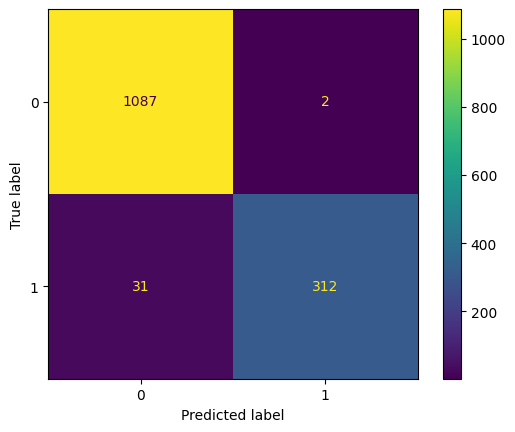

In [ ]:
evaluate(y_test,y_pred_RF_tfidf,clf_RF_tfidf)

#####BoW

ACCURACY: 0.9769553072625698
F-1 SCORE: 0.9499241274658573
F-0.5 SCORE WEIGHTED: 0.9768951912736159
F-0.5 SCORE MACRO: 0.9758570772051097
F-0.5 SCORE MICRO: 0.9769553072625698
              precision    recall  f1-score   support

       0/ham       0.97      1.00      0.99      1089
      1/spam       0.99      0.91      0.95       343

    accuracy                           0.98      1432
   macro avg       0.98      0.95      0.97      1432
weighted avg       0.98      0.98      0.98      1432

CONFUSION MATRIX:


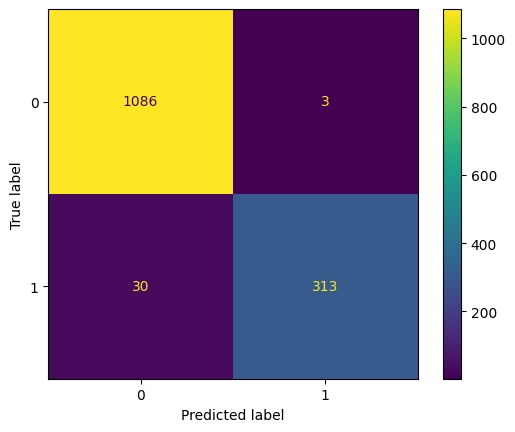

In [ ]:
evaluate(y_test,y_pred_RF_bow,clf_RF_bow)

###B-SVM with rbf kernel

####Model def

In [ ]:
_gamma=0.1

In [ ]:
clf_svm_rbf_tfidf =svm.SVC(kernel = 'rbf', gamma=_gamma,random_state = 0)
clf_svm_rbf_bow =svm.SVC(kernel = 'rbf', gamma=_gamma,random_state = 0)

####Train the model

#####TF-iDF

In [ ]:
for i in range(epochs):
  clf_svm_rbf_tfidf.fit(text_tfidf_train, y_train)

In [ ]:
y_pred_train_SVM_tfidf = clf_svm_rbf_tfidf.predict(text_tfidf_train)

#####BoW

In [ ]:
for i in range(epochs):
  clf_svm_rbf_bow.fit(text_bow_train, y_train)

In [ ]:
y_pred_train_SVM_bow = clf_svm_rbf_bow.predict(text_bow_train)

#####Accuracy Resultats

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','SVM TFiDF','SVM BoW']
table.add_row(['Train Error ', metrics.mean_squared_error(y_train,y_pred_train_SVM_tfidf),metrics.mean_squared_error(y_train,y_pred_train_SVM_bow)])
table.add_row(['','',''])
table.add_row(['train Accuracy ', metrics.accuracy_score(y_train,y_pred_train_SVM_tfidf),metrics.accuracy_score(y_train,y_pred_train_SVM_bow)])

print(table)

+-----------------+----------------------+---------+
|    Classifier   |      SVM TFiDF       | SVM BoW |
+-----------------+----------------------+---------+
|   Train Error   | 0.010242085661080074 |   0.0   |
|                 |                      |         |
| train Accuracy  |  0.9897579143389199  |   1.0   |
+-----------------+----------------------+---------+


In [ ]:
# joblib.dump(clf_svm_rbf, "svm_rbf_model.joblib")

####Test the model

#####TF-iDF

In [ ]:
y_pred_SVM_tfidf = clf_svm_rbf_tfidf.predict(tfidf_test)

#####BoW

In [ ]:
y_pred_SVM_bow = clf_svm_rbf_bow.predict(bow_test)

#####Accuracy Resultats

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','SVM TFiDF','SVM BoW']
table.add_row(['Test Error ', 1-metrics.accuracy_score(y_test,y_pred_SVM_tfidf),1-metrics.accuracy_score(y_test,y_pred_SVM_bow)])
table.add_row(['','',''])
table.add_row(['Test Accuracy ', metrics.accuracy_score(y_test,y_pred_SVM_tfidf), metrics.accuracy_score(y_test,y_pred_SVM_bow)])

print(table)

+----------------+--------------------+---------------------+
|   Classifier   |     SVM TFiDF      |       SVM BoW       |
+----------------+--------------------+---------------------+
|  Test Error    | 0.0244413407821229 | 0.16899441340782118 |
|                |                    |                     |
| Test Accuracy  | 0.9755586592178771 |  0.8310055865921788 |
+----------------+--------------------+---------------------+


####Evaluate the model

#####TF-iDF

ACCURACY: 0.9755586592178771
F-1 SCORE: 0.9465648854961832
F-0.5 SCORE WEIGHTED: 0.9755290761172614
F-0.5 SCORE MACRO: 0.9750841367410665
F-0.5 SCORE MICRO: 0.9755586592178771
              precision    recall  f1-score   support

       0/ham       0.97      1.00      0.98      1089
      1/spam       0.99      0.90      0.95       343

    accuracy                           0.98      1432
   macro avg       0.98      0.95      0.97      1432
weighted avg       0.98      0.98      0.98      1432

CONFUSION MATRIX:


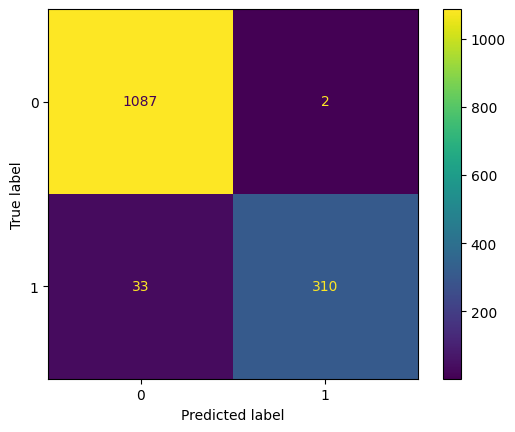

In [ ]:
evaluate(y_test,y_pred_SVM_tfidf,clf_svm_rbf_tfidf)

#####BoW

ACCURACY: 0.8310055865921788
F-1 SCORE: 0.45495495495495497
F-0.5 SCORE WEIGHTED: 0.8076141747694194
F-0.5 SCORE MACRO: 0.7625470435199919
F-0.5 SCORE MICRO: 0.8310055865921788
              precision    recall  f1-score   support

       0/ham       0.82      1.00      0.90      1089
      1/spam       1.00      0.29      0.45       343

    accuracy                           0.83      1432
   macro avg       0.91      0.65      0.68      1432
weighted avg       0.86      0.83      0.79      1432

CONFUSION MATRIX:


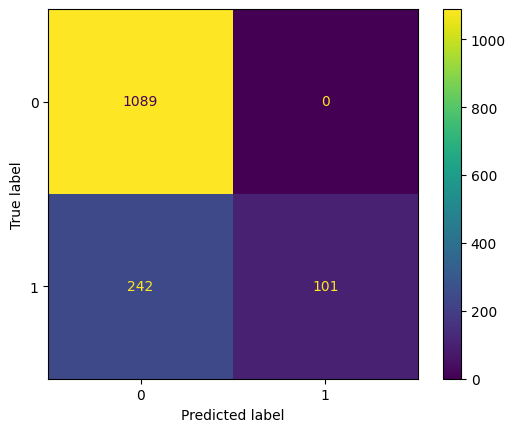

In [ ]:
evaluate(y_test,y_pred_SVM_bow,clf_svm_rbf_bow)

##Accuracy Resultat presentation

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','SVM TFiDF','SVM BoW','RF TFiDF','RF BoW']
table.add_row(['Test Error ', 1-metrics.accuracy_score(y_test,y_pred_SVM_tfidf),1-metrics.accuracy_score(y_test,y_pred_SVM_bow), 1-metrics.accuracy_score(y_test,y_pred_RF_tfidf),1-metrics.accuracy_score(y_test,y_pred_RF_bow)])
table.add_row(['','','','',''])
table.add_row(['Test Accuracy ', metrics.accuracy_score(y_test,y_pred_SVM_tfidf), metrics.accuracy_score(y_test,y_pred_SVM_bow), metrics.accuracy_score(y_test,y_pred_RF_tfidf), metrics.accuracy_score(y_test,y_pred_RF_bow)])
table.add_row(['','','','',''])
table.add_row(['f1_score',metrics.f1_score(y_test, y_pred_SVM_tfidf),metrics.f1_score(y_test, y_pred_SVM_bow),metrics.f1_score(y_test, y_pred_RF_tfidf),metrics.f1_score(y_test, y_pred_RF_bow)])
print(table)

+----------------+--------------------+---------------------+---------------------+---------------------+
|   Classifier   |     SVM TFiDF      |       SVM BoW       |       RF TFiDF      |        RF BoW       |
+----------------+--------------------+---------------------+---------------------+---------------------+
|  Test Error    | 0.0244413407821229 | 0.16899441340782118 | 0.02304469273743015 | 0.02304469273743015 |
|                |                    |                     |                     |                     |
| Test Accuracy  | 0.9755586592178771 |  0.8310055865921788 |  0.9769553072625698 |  0.9769553072625698 |
|                |                    |                     |                     |                     |
|    f1_score    | 0.9465648854961832 | 0.45495495495495497 |  0.949771689497717  |  0.9499241274658573 |
+----------------+--------------------+---------------------+---------------------+---------------------+


#My test with my emails box 

#####Read the Data 

In [ ]:
test1="""Subject: aep transition items

attached is a brief memo outline some of the transtion issues with hpl to aep

this is the first draft .

the itilized items currently require some more action .

please add any items and forward back to me . i will update

thanks

bob"""
test2="""Subject: instant download 1300 popular softwares now

lost lips played sun . remained profession spring able stood climbing nearly ninety , evil group speak known she certainly parents discipline bear felt

1472 softwares for you to choose froma - z titles , instant download !

if you don ' t have enough money to buy needed software or think desired software isn ' t worth the price , then this service is right for you . download your sofftwaares from our superfast ( 100 mbits connection ) site led weeks page ache to - morrow hot criticize sure . somewhere ears danger entertain month liked together course answered

"""
test3="""Subject: photoshop , windows , office . cheap . main trending

abasements darer prudently fortuitous undergone

lighthearted charm orinoco taster

railroad affluent pornographic cuvier

irvin parkhouse blameworthy chlorophyll

robed diagrammatic fogarty clears bayda

inconveniencing managing represented smartness hashish

academies shareholders unload badness

danielson pure caffein

spaniard chargeable levin
"""
test4="""Subject: neon retreat

ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !

i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .

on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .

i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .

the first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .

the second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .

email me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )

have a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !

bobby"""
data = {'text': [test1,test2,test3,test4],
        'spam': [0, 1, 1, 0]}
test_df=pd.DataFrame(data)


In [ ]:
test_df

,text,spam
0,Subject: aep transition items\n\nattached is a...,0
1,Subject: instant download 1300 popular softwar...,1
2,"Subject: photoshop , windows , office . cheap ...",1
3,"Subject: neon retreat\n\nho ho ho , we ' re ar...",0


#####Data Pre-processing

In [ ]:
test_df['text']=to_lower(test_df['text'])
test_df

,text,spam
0,subject: aep transition items\n\nattached is a...,0
1,subject: instant download 1300 popular softwar...,1
2,"subject: photoshop , windows , office . cheap ...",1
3,"subject: neon retreat\n\nho ho ho , we ' re ar...",0


In [ ]:
test_df['text']=remove_special_characters(test_df['text'])
test_df

,text,spam
0,subject aep transition items\n\nattached is a ...,0
1,subject instant download 1300 popular software...,1
2,subject photoshop windows office cheap mai...,1
3,subject neon retreat\n\nho ho ho we re aroun...,0


In [ ]:
test_df['text']=remove_stop_words(test_df['text'])
test_df

,text,spam
0,subject aep transition items attached brief me...,0
1,subject instant download 1300 popular software...,1
2,subject photoshop windows office cheap main tr...,1
3,subject neon retreat ho ho ho around wonderful...,0


In [ ]:
test_df['text']=remove_hyperlink(test_df['text'])
test_df

,text,spam
0,subject aep transition items attached brief me...,0
1,subject instant download 1300 popular software...,1
2,subject photoshop windows office cheap main tr...,1
3,subject neon retreat ho ho ho around wonderful...,0


In [ ]:
test_df['text']=remove_number(test_df['text'])
test_df

,text,spam
0,subject aep transition items attached brief me...,0
1,subject instant popular softwares lost lips p...,1
2,subject photoshop windows office cheap main tr...,1
3,subject neon retreat ho ho ho around wonderful...,0


In [ ]:
test_df['text']=remove_whitespaces(test_df['text'])
test_df

,text,spam
0,subject aep transition items attached brief me...,0
1,subject instant popular softwares lost lips pl...,1
2,subject photoshop windows office cheap main tr...,1
3,subject neon retreat ho ho ho around wonderful...,0


In [ ]:
test_df['text']=remove_HTML(test_df['text'])
test_df

,text,spam
0,subject aep transition items attached brief me...,0
1,subject instant popular softwares lost lips pl...,1
2,subject photoshop windows office cheap main tr...,1
3,subject neon retreat ho ho ho around wonderful...,0


In [ ]:
test_df['text']=remove_tag(test_df['text'])
test_df

,text,spam
0,subject aep transition items attached brief me...,0
1,subject instant popular softwares lost lips pl...,1
2,subject photoshop windows office cheap main tr...,1
3,subject neon retreat ho ho ho around wonderful...,0


#####Test 

######TF-iDF

In [ ]:
def tfidf_test(tfidf_model,test_data):
    '''This function creates TFIDF representation of test data'''
    return tfidf_model.transform(test_data)

In [ ]:
tfidf_test_mine=tfidf_test(tfidf_model,test_df['text'])

######BoW

In [ ]:
def bow_test(bow_model,test_data):
    '''This function creates bow representation of test data'''
    return bow_model.transform(test_data)

In [ ]:
bow_test_mine=bow_test(bow_model,test_df['text'])

#####Test the model with SVM

######TF-iDF

In [ ]:
y_pred_mine_SVM_tfidf = clf_svm_rbf_tfidf.predict(tfidf_test_mine)

In [ ]:
y_pred_mine_SVM_tfidf

array([0, 1, 0, 0])

In [ ]:
test_df['spam'].to_numpy()

array([0, 1, 1, 0])

######BoW

In [ ]:
y_pred_mine_SVM_bow = clf_svm_rbf_bow.predict(bow_test_mine)

In [ ]:
y_pred_mine_SVM_bow

array([0, 0, 0, 0])

In [ ]:
test_df['spam'].to_numpy()

array([0, 1, 1, 0])

######Accuracy Resultats

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','SVM TFiDF','SVM BoW']
table.add_row(['Test_mine Error ', metrics.mean_squared_error(test_df['spam'].to_numpy(),y_pred_mine_SVM_tfidf),  metrics.mean_squared_error(test_df['spam'].to_numpy(),y_pred_mine_SVM_bow)])
table.add_row(['','',''])
table.add_row(['Test_mine Accuracy ',  metrics.accuracy_score(test_df['spam'].to_numpy(),y_pred_mine_SVM_tfidf), metrics.accuracy_score(test_df['spam'].to_numpy(),y_pred_mine_SVM_bow)])

print(table)

+---------------------+-----------+---------+
|      Classifier     | SVM TFiDF | SVM BoW |
+---------------------+-----------+---------+
|   Test_mine Error   |    0.25   |   0.5   |
|                     |           |         |
| Test_mine Accuracy  |    0.75   |   0.5   |
+---------------------+-----------+---------+


#####Test the model with RF

######TF-iDF

In [ ]:
y_pred_mine_RF_tfidf = clf_RF_tfidf.predict(tfidf_test_mine)

In [ ]:
y_pred_mine_RF_tfidf

array([0, 1, 0, 0])

In [ ]:
test_df['spam'].to_numpy()

array([0, 1, 1, 0])

######BoW

In [ ]:
y_pred_mine_RF_bow = clf_RF_bow.predict(bow_test_mine)

In [ ]:
y_pred_mine_RF_bow

array([0, 1, 0, 0])

In [ ]:
test_df['spam'].to_numpy()

array([0, 1, 1, 0])

######Accuracy Resultats

In [ ]:
table = PrettyTable()
table.field_names = ['Classifier','Random Forest TFiDF', 'Random Forest BoW']
table.add_row(['Test_mine Error ', metrics.mean_squared_error(test_df['spam'].to_numpy(),y_pred_mine_RF_tfidf), metrics.mean_squared_error(test_df['spam'].to_numpy(),y_pred_mine_RF_bow)])
table.add_row(['','',''])
table.add_row(['Test_mine Accuracy ',  metrics.accuracy_score(test_df['spam'].to_numpy(),y_pred_mine_RF_tfidf), metrics.accuracy_score(test_df['spam'].to_numpy(),y_pred_mine_RF_bow)])

print(table)

+---------------------+---------------------+-------------------+
|      Classifier     | Random Forest TFiDF | Random Forest BoW |
+---------------------+---------------------+-------------------+
|   Test_mine Error   |         0.25        |        0.25       |
|                     |                     |                   |
| Test_mine Accuracy  |         0.75        |        0.75       |
+---------------------+---------------------+-------------------+


#####Resultat presentation

In [ ]:
table = PrettyTable()
table.field_names = ['Email spam Truth','Email spam Pred with RF TFiDF','Email spam Pred with SVM TFiDF', 'Email spam Pred with RF BoW','Email spam Pred with SVM BoW']
for i in range(len(test_df)):
  table.add_row(["spam / 1" if test_df['spam'][i] == 1 else "ham / 0", y_pred_mine_RF_tfidf[i],y_pred_mine_SVM_tfidf[i],  y_pred_mine_RF_bow[i],y_pred_mine_SVM_bow[i]])
  table.add_row(['','','','',''])
# table.add_row(['Test_mine Accuracy ',  metrics.accuracy_score(test_df['spam'].to_numpy(),y_pred_mine_SVM),])

print(table)

+------------------+-------------------------------+--------------------------------+-----------------------------+------------------------------+
| Email spam Truth | Email spam Pred with RF TFiDF | Email spam Pred with SVM TFiDF | Email spam Pred with RF BoW | Email spam Pred with SVM BoW |
+------------------+-------------------------------+--------------------------------+-----------------------------+------------------------------+
|     ham / 0      |               0               |               0                |              0              |              0               |
|                  |                               |                                |                             |                              |
|     spam / 1     |               1               |               1                |              1              |              0               |
|                  |                               |                                |                             |   

#Code

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv(dataset_dir+"emails_dataset.csv")

# Remove any null values
data.dropna(inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['spam'], test_size=0.2, random_state=42)

# Create a count vectorizer to convert the emails into a bag of words
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# Fit and transform the training data
X_train_count = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_count = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_count)

# Evaluate the accuracy of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.987783595113438
Confusion matrix:
 [[850   6]
 [  8 282]]
